<a href="https://colab.research.google.com/github/coegoke/Credit-Loan/blob/main/Loan_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Loan Credit Project** 
Industri Jasa Keuangan merujuk pada pelayanan jasa di bidang industri keuangan. Industri jasa keuangan juga bisa mengacu pada sejumlah organisasi yang memiliki wewenang untuk pengelolaan dana. Salah satu layanan yang diberikan adalah Kredit Pinjaman.

Kredit Pinjaman adalah penyediaan dana dalam jumlah tertentu dari bank untuk mendukung tujuan nasabah, dengan berdasarkan persetujuan atau kesepakatan pinjam meminjam yang mewajibkan peminjam untuk melunasi pinjaman dalam waktu tertentu beserta pembayaran bunga dan biaya lainnya.

#Import Library

In [6]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 288 kB 7.7 MB/s 
     |████████████████████████████████| 17.3 MB 441 kB/s 
     |████████████████████████████████| 9.4 MB 36.7 MB/s 
     |████████████████████████████████| 280 kB 50.5 MB/s 
     |████████████████████████████████| 12.2 MB 31.8 MB/s 
     |████████████████████████████████| 965 kB 48.4 MB/s 
     |████████████████████████████████| 295 kB 45.7 MB/s 
     |████████████████████████████████| 33.8 MB 160 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

# Import Data

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import os
csv_filename = '/content/gdrive/MyDrive/portofolio Data/loan_data_2007_2014.csv'
feather_filename = "loan_data_2007_2014.feather"
if not os.path.exists(feather_filename):
    # Baca melalui csv
    df = pd.read_csv(csv_filename)

    # Ubah ke feather
    df.to_feather("loan_data_2007_2014.feather")

In [36]:
df = pd.read_feather(feather_filename)

#Deskripsi Data

In [5]:
display(df.head())

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,None,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,None,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,None,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,None,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,None,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,None,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,None,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [7]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
data_dict = pd.read_excel("/content/gdrive/MyDrive/portofolio Data/LCDataDictionary.xlsx", sheet_name="LoanStats")
data_dict.rename(columns={'Unnamed: 0':'Features','Unnamed: 2':'Deskripsi'},inplace=True)
data_dict

,Features,Description,Deskripsi
0,_rec,The total amount committed by investors for th...,Jumlah total yang dilakukan oleh investor untu...
1,acc_now_delinq,The number of accounts on which the borrower i...,Jumlah akun di mana peminjam sekarang nakal.
2,addr_state,The state provided by the borrower in the loan...,Negara yang disediakan oleh peminjam dalam apl...
3,all_util,Balance to credit limit on all trades,Saldo ke batas kredit untuk semua perdagangan
4,annual_inc,The self-reported annual income provided by th...,v
5,annual_inc_joint,The combined self-reported annual income provi...,Penghasilan tahunan yang dilaporkan sendiri ga...
6,application_type,Indicates whether the loan is an individual ap...,NaN
7,collection_recovery_fee,post charge off collection fee,Biaya pengumpulan biaya penagihan
8,collections_12_mths_ex_med,Number of collections in 12 months excluding m...,Jumlah koleksi dalam 12 bulan tidak termasuk k...
9,delinq_2yrs,The number of 30+ days past-due incidences of ...,Jumlah 30+ hari insiden kenakalan yang lewat d...


In [9]:
df_clean= df.copy()

In [10]:
df_clean.drop(columns='Unnamed: 0',inplace=True)

* drop kolom `Unnamed: 0  ` karena itu hanya sebuah index dalam tabel



In [11]:
cat = df_clean.select_dtypes(include='object').columns.to_list()
numerical = df_clean.select_dtypes(exclude='object').columns.to_list()

In [12]:
df_clean[cat].describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


*   drop kolom yang memiliki 1 unik values dan memiliki values yang sangat banyak
*   kolom `last_pymnt_d` dan `next_pymnt_d` memiliki data tanggal tetapi tipe datanya masih object

In [13]:
df_clean[numerical].describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,

#Labeling Target 

Saat memodelkan risiko kredit proyek, tujuan utamanya adalah memprediksi kemampuan seseorang untuk melakukan pembayaran pinjaman/kredit. Oleh karena itu, variabel target yang digunakan harus mencerminkan kapasitas individu dalam hal ini.

dalam dataset ini, variabel *loan_status* adalah variabel target yang rinciannya menunjukkan kondisi-kondisi seseorang dalam melakukan pembayaran kredit selama ini

In [37]:
df.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

dalam variabel terdapat beberapa nilai :
1. Current = Pembayaran lancar
2. Fully Paid = Pembayaran lunas
3. Charged off = Pembayaran macet
4. Late (31-120 days) = telat 31-120 hari
5. In grace period = Masa tenggang
6. Does not meet. Status:Fully paid = Tidak memenuhi kebijakan kredit. Status: Dibayar Penuh
7. Late (16-30 days) = telat 16-30 hari
8. Default = Pembayaran macet
9. Does not meet. Status:Charged Off = Tidak memenuhi kebijakan kredit. Status: pembayaran macet

dari rincian tersebut, kita bisa kategorikan seseorang apakah mereka `bad loan` (Peminjam yang buruk) atau `Good loan` (Peminjam yang baik) tidak

namun kategori tersebut akan berbeda dari masing-masing kebutuhan bisnis. Pada Kasus ini saya akan menggunakan keterlambatan pembayaran ataupun bahkan lebih buruk sebagai penanda bad loan

In [38]:
bad_status = [
    'Charged Off' 
    , 'Default' 
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
    , 'Late (16-30 days)'
]

df['loan_status'] = np.where(df['loan_status'].isin(bad_status), 0, 1)
df['loan_status'].value_counts(normalize=True)*100

1    88.808132
0    11.191868
Name: loan_status, dtype: float64

#EDA

##Status Pinjaman

In [39]:
import plotly
import plotly.graph_objects as go
df_type = df.groupby('loan_status')['id'].count().reset_index()
df_type = df_type.rename(columns = {"id":"count_showids"})
layout = go.Layout(title='<b>Status Pinjaman</b>')
fig = go.Figure(layout=layout)
fig.add_trace(
    
    go.Pie(labels=['0 (Bad Loan)','1 (Good Loan)'], values=df_type['count_showids'], marker_colors= ["#8c0a07","#07898c"],textinfo='label+percent+value',pull=[0,0.1]
           ))
fig.update_layout(
    title='Status Pinjaman',title_font_family="Arial Black",title_font_color="#07898c",title_font_size=32,title_x=0.5,width=800,
    legend=dict(
        x=0,
        y=1,
        title_font_family="Times New Roman",
        font=dict(
            size=12,
            color="black"
        ),
        bgcolor="LightBlue",
        bordercolor="Black",
        borderwidth=1
    ),
    legend_title_text='Kategori')

plotly.offline.iplot(fig)

dari `loan_status`, kategori **Good Loan** (88,8%) lebih mendominasi dari **Bad Loan** (11,2%)

##Tujuan Peminjam

In [44]:
df[['Month','Year']] = df['issue_d'].str.split('-',expand=True)
df['Year'] = df['Year'].replace(['07','08','09','10','11','12','13','14'],['2007','2008','2009','2010','2011','2012','2013','2014'])

In [45]:
from plotly.subplots import make_subplots
df_purpose = df.groupby(['purpose','Year'])['loan_amnt'].sum().reset_index()
df2 = df.purpose.value_counts().sort_values()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'scatter'}]])

fig.add_trace(go.Bar(x=df2,y=df2.index,text=df2
              ,marker_color="#07898c", name='Kategori',orientation = 'h')
              ,row=1,col=1)


fig.update_layout(
    title='Tujuan Peminjam',title_font_family="Arial Black",title_font_color="#07898c",title_font_size=32,title_x=0.5,
    xaxis_tickfont_size=14,xaxis_tickfont_color="#07898c",
    yaxis=dict(
        title='Kategori',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.update_yaxes(tickfont_family="Arial")

fig.add_trace(go.Scatter(name='Other',mode='lines',x=df_purpose[df_purpose['purpose'] == 'other']['Year'], 
                         y=df_purpose[df_purpose['purpose'] == 'other']['loan_amnt'],
                          line=dict(color='#01939e', width=1)),row=1,col=2)

fig.update_traces(texttemplate='%{text:} People')


In [46]:
df.groupby(['purpose','Year'])['loan_amnt'].sum().reset_index().sort_values(by='loan_amnt', ascending=False).head(20)

,purpose,Year,loan_amnt
23,debt_consolidation,2014,2203835875
22,debt_consolidation,2013,1251110425
15,credit_card,2014,853482525
14,credit_card,2013,482561225
21,debt_consolidation,2012,445182300
35,home_improvement,2014,189687575
20,debt_consolidation,2011,144057250
13,credit_card,2012,135468775
75,other,2014,105173150
34,home_improvement,2013,104862250


In [47]:
df_purpose = df.groupby(['purpose','Year'])['loan_amnt'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(name='Other',mode='lines',x=df_purpose[df_purpose['purpose'] == 'other']['Year'], 
                         y=df_purpose[df_purpose['purpose'] == 'other']['loan_amnt'],
                          line=dict(color='#01939e', width=1)))
fig.add_trace(go.Scatter(name='Credit Card',mode='lines',x=df_purpose[df_purpose['purpose'] == 'credit_card']['Year'], 
                         y=df_purpose[df_purpose['purpose'] == 'credit_card']['loan_amnt'],
                          line=dict(color='#2b019e', width=1)))
fig.add_trace(go.Scatter(name='Debt Consolidation',mode='lines',x=df_purpose[df_purpose['purpose'] == 'debt_consolidation']['Year'], 
                         y=df_purpose[df_purpose['purpose'] == 'debt_consolidation']['loan_amnt'],
                          line=dict(color='#9e0c01', width=1)))
fig.add_trace(go.Scatter(name='Home Improvement',mode='lines',x=df_purpose[df_purpose['purpose'] == 'home_improvement']['Year'], 
                         y=df_purpose[df_purpose['purpose'] == 'home_improvement']['loan_amnt'],
                          line=dict(color='#9e6a01', width=1)))
fig.add_trace(go.Scatter(name='Small Business',mode='lines',x=df_purpose[df_purpose['purpose'] == 'small_business']['Year'], 
                         y=df_purpose[df_purpose['purpose'] == 'small_business']['loan_amnt'],
                          line=dict(color='#01939e', width=1)))
fig.add_trace(go.Scatter(name='Major Purchase',mode='lines',x=df_purpose[df_purpose['purpose'] == 'major_purchase']['Year'], 
                         y=df_purpose[df_purpose['purpose'] == 'major_purchase']['loan_amnt'],
                          line=dict(color='#FF6600', width=1)))

##negara apa yang paling banyak menggunakan jasa pinjaman?

In [48]:
df3 = df.addr_state.value_counts()
df3 = df3.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=df3.index,y=df3,text=df3
              ,marker_color="#07898c", name='Content'))
fig.update_layout(
    title='Asal Negara Peminjam',title_font_color="#07898c",title_font_size=32,
    xaxis_tickfont_size=14,xaxis_tickfont_color='#07898c',
    yaxis=dict(
        title='Content',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.update_traces(texttemplate='%{text:} People', textposition='outside')
fig.show(renderer='colab')

##Apa status kepemilikan rumah nasabah terbanyak yang menggunakan jasa pinjaman?

In [49]:
df.home_ownership = df.home_ownership.replace(['ANY'],'OTHER')
df.home_ownership.value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          183
NONE            50
Name: home_ownership, dtype: int64

In [50]:
df3 = df.home_ownership.value_counts()
df3 = df3.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=df3.index,y=df3,text=df3
              ,marker_color="#07898c", name='Content'))
fig.update_layout(
    title='Status Kepemilikan Rumah',title_font_color="#07898c",title_font_size=32,width=700,
    xaxis_tickfont_size=14,xaxis_tickfont_color='#07898c',
    yaxis=dict(
        title='Total',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.update_traces(texttemplate='%{text:} Orang', textposition='outside')
fig.show(renderer='colab')

##Jenis pekerjaan nasabah yang paling banyak meminjam berdasarkan lama bekerja dan bagaimana trek pembayarannya?

In [51]:
df3 = df.emp_title.value_counts()
df3 = df3.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=df3.index,y=df3,text=df3
              ,marker_color="#07898c", name='Content'))
fig.update_layout(
    title='Asal Negara Peminjam',title_font_color="#07898c",title_font_size=32,
    xaxis_tickfont_size=14,xaxis_tickfont_color='#07898c',
    yaxis=dict(
        title='Content',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.update_traces(texttemplate='%{text:} People', textposition='outside')
fig.show(renderer='colab')

##pinjaman yang diterima peminjam berdasarkan tahun(loan_amnt,issue_d)

In [52]:
df_amnt = df.groupby(['Year'])['loan_amnt'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(name='Peminjaman',mode='lines',x=df_amnt.Year, y=df_amnt.loan_amnt,
                          line=dict(color='#01939e', width=2)))
fig.update_layout(
    title='Total Pinjaman Tahunan',title_font_color="#07898c",title_font_size=32,
    xaxis_tickfont_size=14,xaxis_tickfont_color='#07898c',
    yaxis=dict(
        title='Content',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

##apa grade terbesar dari status pembayaran nasabah berdasarkan uang pinjaman

In [55]:
df3 = df.grade.value_counts()
df3 = df3.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=df3.index,y=df3,text=df3
              ,marker_color="#07898c", name='Content'))
fig.update_layout(
    title='Grade Tertinggi',title_font_color="#07898c",title_font_size=32,width=700,
    xaxis_tickfont_size=14,xaxis_tickfont_color='#07898c',
    yaxis=dict(
        title='Total',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.update_traces(texttemplate='%{text:} People', textposition='outside')
fig.show(renderer='colab')

##berapa penghasilan nasabah berdasarkan grade dan trek dari tahun ke tahun?

In [29]:
df.annual_inc = np.select([df.annual_inc <75000, df.annual_inc <150000, df.annual_inc >75000],
                          ['Low','Medium','High'])
df.annual_inc = df.annual_inc.replace(['0'],'Low')
df.annual_inc.value_counts()

Low       291983
Medium    149817
High       24485
Name: annual_inc, dtype: int64

In [58]:
df3 = df.annual_inc.value_counts()
df3 = df3.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=df3.index,y=df3,text=df3
              ,marker_color="#07898c", name='Content'))
fig.update_layout(
    title='Kategori Penghasilan Nasabah',title_font_color="#07898c",title_font_size=32,
    xaxis_tickfont_size=14,xaxis_tickfont_color='#07898c',
    yaxis=dict(
        title='Content',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.update_traces(texttemplate='%{text:} People', textposition='outside')
fig.show(renderer='colab')

#Cleaning dan Data Preprocessing

##Menghilangkan fitur yang tidak terpakai

In [7]:
# Informasi rinci mengenai kolom dan baris data
data_stat = pd.DataFrame()
data_stat.index = df.columns
data_stat["unique_value"] = df.nunique()
data_stat["missing_rate"] = df.isna().mean()
data_stat["dtype"] = df.dtypes
data_stat

,unique_value,missing_rate,dtype
Unnamed: 0,466285,0.000000,int64
id,466285,0.000000,int64
member_id,466285,0.000000,int64
loan_amnt,1352,0.000000,int64
funded_amnt,1354,0.000000,int64
funded_amnt_inv,9854,0.000000,float64
term,2,0.000000,object
int_rate,506,0.000000,float64
installment,55622,0.000000,float64
grade,7,0.000000,object


In [8]:
# Kolom yang semua datanya hilang
miss_col = data_stat[data_stat["missing_rate"] == 1].index.to_list()
print("Kolom yang semua datanya hilang:")
print(miss_col)
print()

# Kolom yang terlalu unik
vari_col = data_stat[data_stat["unique_value"] == df.shape[0]].index.to_list()
print("Kolom yang terlalu unik:")
print(vari_col)
print()

# Kolom dengan kategori yang banyak
cat_col_stat = data_stat[data_stat["dtype"] == "object"]
vari_cat_col = cat_col_stat[cat_col_stat["unique_value"] > 1000].index.to_list()
print("Kolom dengan kategori yang banyak:")
print(vari_cat_col)
print()

# Kolom yang terdiri dari satu nilai
single_valued_col = data_stat[data_stat["unique_value"] == 1].index.to_list()
print("Kolom yang terlalu unik:")
print(single_valued_col)
print()

removed_features = miss_col + vari_col + vari_cat_col + single_valued_col

Kolom yang semua datanya hilang:
['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

Kolom yang terlalu unik:
['Unnamed: 0', 'id', 'member_id', 'url']

Kolom dengan kategori yang banyak:
['emp_title', 'url', 'desc', 'title']

Kolom yang terlalu unik:
['policy_code', 'application_type']



In [9]:
# Hilangkan fitur yang tidak terpakai
pre_df = df.loc[:, ~df.columns.isin(removed_features)].copy()
pre_df.shape

(466285, 49)

##Fitur Numerikal


In [10]:
pre_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,1,n,credit_card,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,None,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,0,n,car,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,None,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,1,n,small_business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,None,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,1,n,other,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,None,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,1,n,other,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN


In [11]:
#preprocessing kolom term
pre_df['term'] = pre_df['term'].str.replace(' months', '')
pre_df['term'] = pre_df['term'].astype(float)

In [12]:
#preprocessing kolom emp_length
pre_df['emp_length'] = pre_df['emp_length'].str.replace('\+ years', '')
pre_df['emp_length'] = pre_df['emp_length'].str.replace('< 1 year', str(0))
pre_df['emp_length'] = pre_df['emp_length'].str.replace(' years', '')
pre_df['emp_length'] = pre_df['emp_length'].str.replace(' year', '')
pre_df['emp_length'] = pre_df['emp_length'].astype(float)

<ipython-input-12-642ba561e84a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  pre_df['emp_length'] = pre_df['emp_length'].str.replace('\+ years', '')


In [13]:
# Hitung korelasi tiap variabel
correlations = (pre_df.select_dtypes(exclude=object)
                         .corr()
                         .dropna(how="all", axis=0)
                         .dropna(how="all", axis=1)
)

In [14]:
correlations["loan_status"].abs().sort_values(ascending=False)

loan_status                    1.000000
recoveries                     0.435352
collection_recovery_fee        0.295281
total_rec_prncp                0.254255
total_pymnt_inv                0.194638
total_pymnt                    0.193977
int_rate                       0.174648
last_pymnt_amnt                0.170164
total_rec_late_fee             0.151624
out_prncp                      0.150442
out_prncp_inv                  0.150430
inq_last_6mths                 0.073109
term                           0.064644
revol_util                     0.051020
tot_cur_bal                    0.050865
annual_inc                     0.049484
dti                            0.049092
total_rev_hi_lim               0.037735
total_rec_int                  0.022833
mths_since_last_record         0.022542
total_acc                      0.022366
revol_bal                      0.018536
emp_length                     0.016731
installment                    0.015347
loan_amnt                      0.013181


In [15]:
# Saring korelasi antara vmin - vmax
vmin, vmax = 0.1, 0.99

unstack_corr = correlations.unstack()
pos_corr = (unstack_corr > vmin) & (unstack_corr < vmax)
neg_corr = (unstack_corr > -vmax) & (unstack_corr < -vmin)
high_corr = unstack_corr[pos_corr | neg_corr]

trimmed_corr = high_corr.sort_values(ascending=False).unstack()

In [16]:
# Buat mask untuk membentuk matriks segitiga bawah
mask = np.zeros_like(trimmed_corr)
mask[np.triu_indices_from(mask)] = True

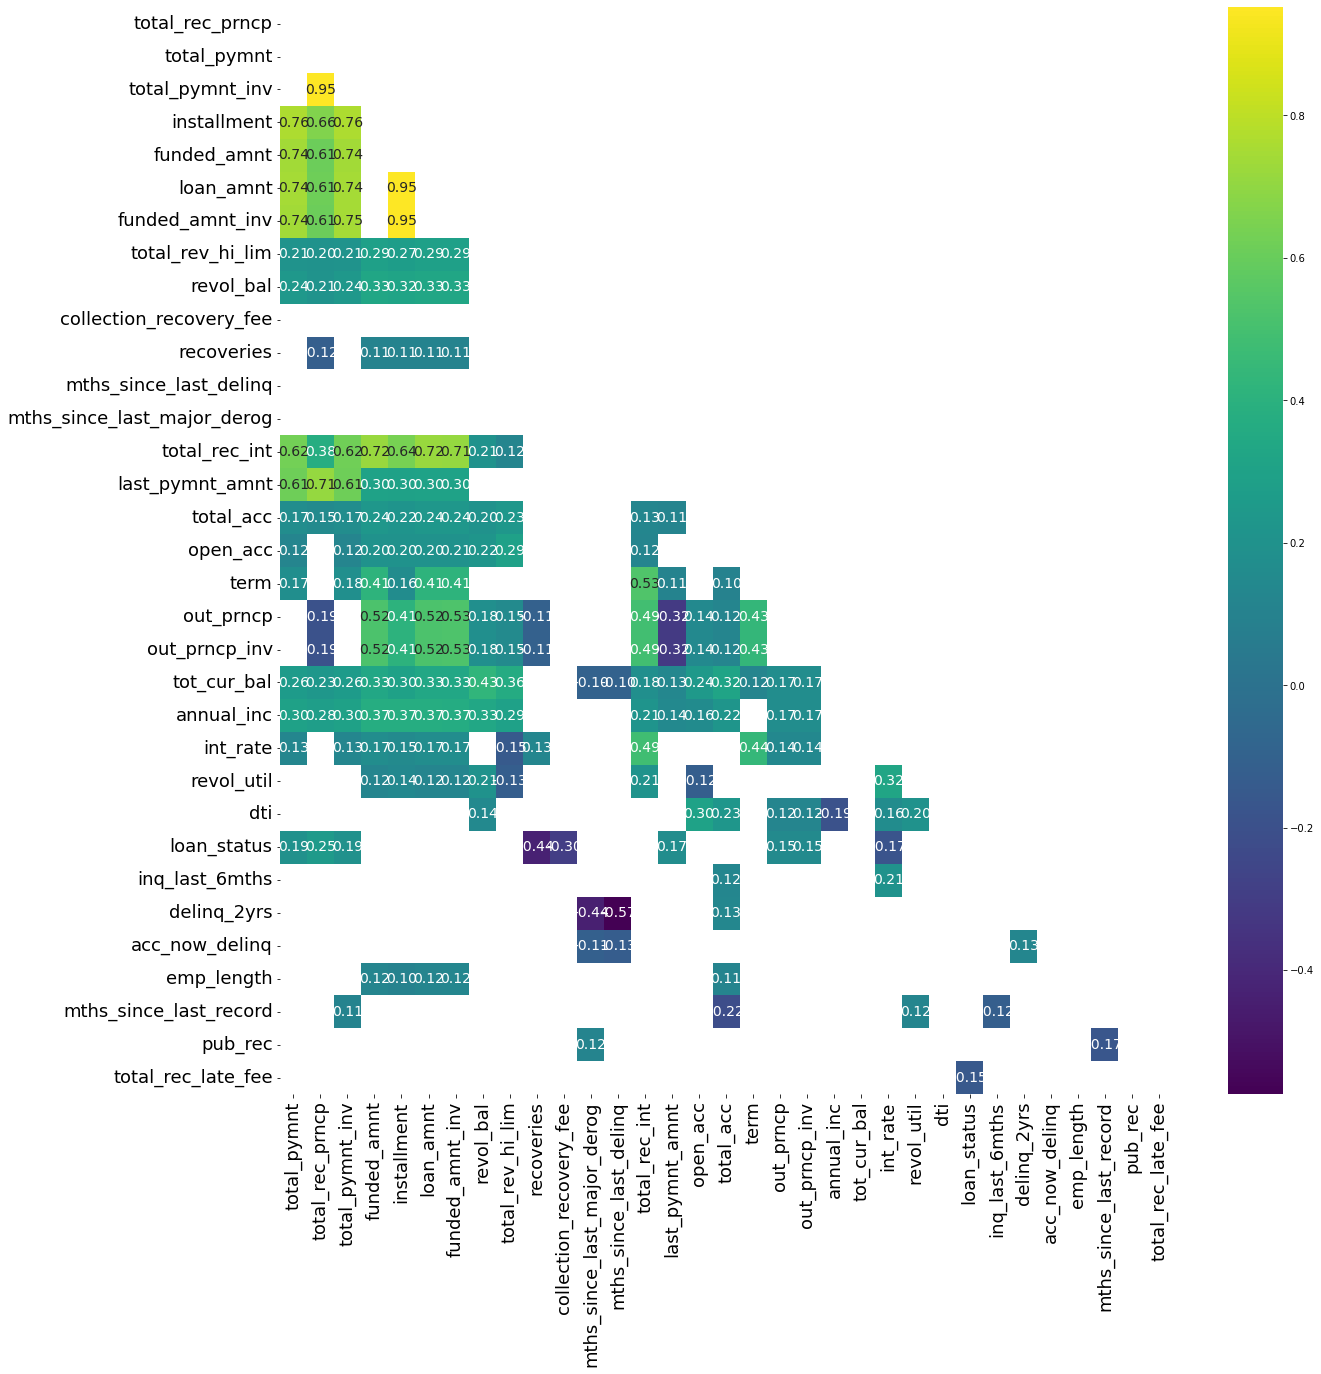

In [17]:
# Tampilkan heatmap
plt.figure(figsize=(20, 20))
plot = sns.heatmap(
    trimmed_corr, 
    annot=True, 
    mask=mask,
    fmt=".2f", 
    cmap="viridis", 
    annot_kws={"size": 14})

plot.set_xticklabels(plot.get_xticklabels(), size=18)
plot.set_yticklabels(plot.get_yticklabels(), size=18)
plt.show()

Dari heatmap diatas terdapat beberapa variabel yang memiliki pengaruh terhadap status pinjaman, diantaranya:

In [18]:
affect_loan = high_corr.loc["loan_status"].abs().sort_values(ascending=False)
affect_loan

recoveries                 0.435352
collection_recovery_fee    0.295281
total_rec_prncp            0.254255
total_pymnt_inv            0.194638
total_pymnt                0.193977
int_rate                   0.174648
last_pymnt_amnt            0.170164
total_rec_late_fee         0.151624
out_prncp                  0.150442
out_prncp_inv              0.150430
dtype: float64

Sedangkan fitur yang saling berkorelasi dengan yang sebelumnya perlu kita identifikasi. Kita menggunakan nilai batas 0.9 untuk mencari fitur yang saling berkorelasi kuat.

In [19]:
threshold = 0.9
affect_collision = (high_corr.abs()
                             .loc[high_corr > threshold]
                             .loc[affect_loan.index, affect_loan.index]
                             .sort_values(ascending=False)
)
affect_collision

<ipython-input-19-d22e6ced66a5>:2: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  affect_collision = (high_corr.abs()


total_rec_prncp  total_pymnt        0.956658
total_pymnt      total_rec_prncp    0.956658
total_rec_prncp  total_pymnt_inv    0.952158
total_pymnt_inv  total_rec_prncp    0.952158
dtype: float64

Berdasarkan besar pengaruhnya terhadap status pinjaman, fitur yang saling berkorelasi akan dipilih berdasarkan yang paling berpengaruh.

In [20]:
left_index = affect_collision.index.get_level_values(0)
right_index = affect_collision.index.get_level_values(1)

def remove_collide_index(left_index, right_index):
    include, exclude = [], []

    for left, right in zip(left_index, right_index):
        if left not in include and left not in exclude:
            include.append(left)
        if right not in include and right not in exclude:
            exclude.append(right)
        
    return include, exclude


include_affect_col, exclude_affect_col = remove_collide_index(left_index, right_index)
include_affect_col, exclude_affect_col

(['total_rec_prncp'], ['total_pymnt', 'total_pymnt_inv'])

In [21]:
affect_num_cols = affect_loan[~affect_loan.index.isin(exclude_affect_col)].index.to_list()
affect_num_cols

['recoveries',
 'collection_recovery_fee',
 'total_rec_prncp',
 'int_rate',
 'last_pymnt_amnt',
 'total_rec_late_fee',
 'out_prncp',
 'out_prncp_inv']

##Fitur Kategorikal

In [22]:
# Kolom-kolom yang berdata kategorik
cat_features = pre_df.select_dtypes(include=object).columns
cat_features

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'pymnt_plan', 'purpose', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

##Kolom yang berisikan tanggal

In [23]:
date_cols = ["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d", "next_pymnt_d"]
pre_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

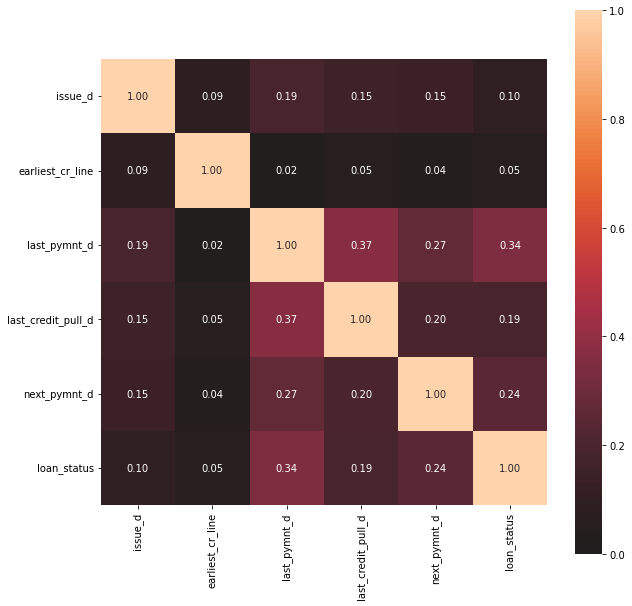

In [24]:
# Korelasi antar tanggal dan status pinjaman
used_cols = date_cols + ["loan_status"] 
complete_correlation = associations(
    pre_df[used_cols], 
    filename='date_correlation.png',
    figsize=(10,10)
)

Tidak terdapat korelasi yang kuat antar tanggal serta tiap tanggal memiliki sedikit korelasi dengan status pinjaman. Namun kita akan menghapus fitur tanggal yang berkorelasi kurang dari 0.1 dengan status pinjaman

In [25]:
# Fitur tanggal yang akan kita gunakan
affect_date_cols = ["issue_d", "last_pymnt_d", "last_credit_pull_d", "next_pymnt_d"]

# Hapus fitur tanggal yang tidak memiliki korelasi kuat dengan status pinjaman
unused_cols = ["earliest_cr_line"]
pre_df = pre_df.drop(columns=unused_cols, errors="ignore")
pre_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36.0,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,Dec-11,1,n,credit_card,860xx,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,None,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60.0,15.27,59.83,C,C4,0.0,RENT,30000.0,Source Verified,Dec-11,0,n,car,309xx,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,None,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36.0,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,Dec-11,1,n,small_business,606xx,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,None,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36.0,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,Dec-11,1,n,other,917xx,CA,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,None,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60.0,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,Dec-11,1,n,other,972xx,OR,17.94,0.0,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN


##Kolom Kategorik yang Tidak Terpakai

In [26]:
other_cat_cols = cat_features[~cat_features.isin(date_cols)]
other_cat_cols

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'zip_code', 'addr_state',
       'initial_list_status'],
      dtype='object')

In [27]:
pre_df.loc[:, other_cat_cols].head()

,grade,sub_grade,home_ownership,verification_status,pymnt_plan,purpose,zip_code,addr_state,initial_list_status
0,B,B2,RENT,Verified,n,credit_card,860xx,AZ,f
1,C,C4,RENT,Source Verified,n,car,309xx,GA,f
2,C,C5,RENT,Not Verified,n,small_business,606xx,IL,f
3,C,C1,RENT,Source Verified,n,other,917xx,CA,f
4,B,B5,RENT,Source Verified,n,other,972xx,OR,f


Beberapa kolom kategorikal yang tidak terpakai adalah:

desc dan title karena merupakan teks.
zip_code karena 3 angka dibelakangnya disensor
sub_grade karena sudah memiliki kolom yang mirip yaitu grade

In [28]:
unused_cols = ["desc", "zip_code", "sub_grade", "title"]
pre_df = pre_df.drop(columns=unused_cols, errors="ignore")
pre_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36.0,10.65,162.87,B,10.0,RENT,24000.0,Verified,Dec-11,1,n,credit_card,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,None,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60.0,15.27,59.83,C,0.0,RENT,30000.0,Source Verified,Dec-11,0,n,car,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,None,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36.0,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,Dec-11,1,n,small_business,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,None,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36.0,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,Dec-11,1,n,other,CA,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,None,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60.0,12.69,67.79,B,1.0,RENT,80000.0,Source Verified,Dec-11,1,n,other,OR,17.94,0.0,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN


In [29]:
pre_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36.0,10.65,162.87,B,10.0,RENT,24000.0,Verified,Dec-11,1,n,credit_card,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,None,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60.0,15.27,59.83,C,0.0,RENT,30000.0,Source Verified,Dec-11,0,n,car,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,None,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36.0,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,Dec-11,1,n,small_business,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,None,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36.0,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,Dec-11,1,n,other,CA,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,None,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60.0,12.69,67.79,B,1.0,RENT,80000.0,Source Verified,Dec-11,1,n,other,OR,17.94,0.0,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN


In [30]:
other_cat_cols = cat_features[~cat_features.isin(date_cols + unused_cols)]
other_cat_cols

Index(['grade', 'home_ownership', 'verification_status', 'pymnt_plan',
       'purpose', 'addr_state', 'initial_list_status'],
      dtype='object')

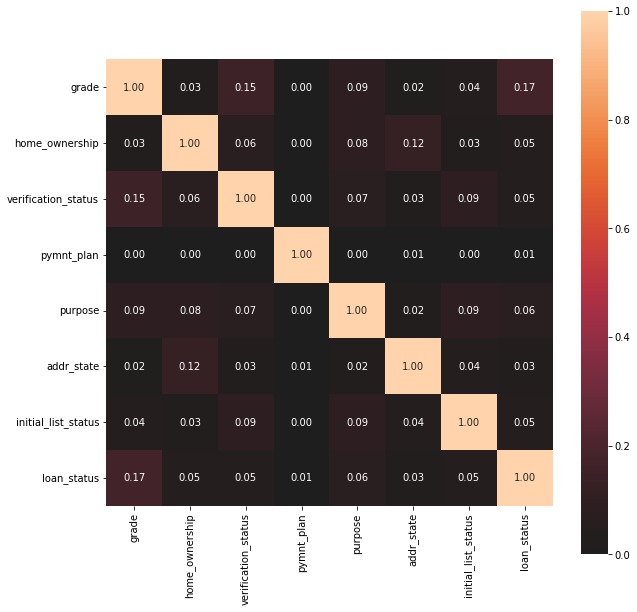

In [31]:
# Korelasi antar fitur kategorikal dan status pinjaman
used_cols = other_cat_cols.to_list() + ["loan_status"]
complete_correlation = associations(
    pre_df[used_cols], 
    filename='cat_correlation.png',
    figsize=(10,10)
)

fitur grade memiliki korelasi dengan status pinjaman

In [32]:
# Fitur kategorikal yang akan kita gunakan
affect_cat_cols = ["grade"]
unused_cols = other_cat_cols[~other_cat_cols.isin(affect_cat_cols)]
pre_df = pre_df.drop(columns=unused_cols, errors="ignore")
pre_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,issue_d,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36.0,10.65,162.87,B,10.0,24000.0,Dec-11,1,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,None,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60.0,15.27,59.83,C,0.0,30000.0,Dec-11,0,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,None,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36.0,15.96,84.33,C,10.0,12252.0,Dec-11,1,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,None,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36.0,13.49,339.31,C,10.0,49200.0,Dec-11,1,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,None,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60.0,12.69,67.79,B,1.0,80000.0,Dec-11,1,17.94,0.0,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN


#Feature Selection

In [33]:
# Kolom-kolom yang akan kita gunakan
predictor_cols = affect_num_cols + affect_cat_cols + affect_date_cols
predictor_cols

['recoveries',
 'collection_recovery_fee',
 'total_rec_prncp',
 'int_rate',
 'last_pymnt_amnt',
 'total_rec_late_fee',
 'out_prncp',
 'out_prncp_inv',
 'grade',
 'issue_d',
 'last_pymnt_d',
 'last_credit_pull_d',
 'next_pymnt_d']

#Imputasi Missing Value

In [34]:
pre_df[predictor_cols].isna().mean().sort_values(ascending=False)

next_pymnt_d               0.487286
last_pymnt_d               0.000806
last_credit_pull_d         0.000090
recoveries                 0.000000
collection_recovery_fee    0.000000
total_rec_prncp            0.000000
int_rate                   0.000000
last_pymnt_amnt            0.000000
total_rec_late_fee         0.000000
out_prncp                  0.000000
out_prncp_inv              0.000000
grade                      0.000000
issue_d                    0.000000
dtype: float64

In [35]:
# Isi data dengan "no"
pre_df["next_pymnt_d"] = pre_df["next_pymnt_d"].fillna("no")
pre_df["last_pymnt_d"] = pre_df["last_pymnt_d"].fillna("no")
pre_df["last_credit_pull_d"] = pre_df["last_credit_pull_d"].fillna("no")

Cek kembali apakah masih ada data yang hilang

In [36]:
pre_df[predictor_cols].isna().mean().sort_values(ascending=False)

recoveries                 0.0
collection_recovery_fee    0.0
total_rec_prncp            0.0
int_rate                   0.0
last_pymnt_amnt            0.0
total_rec_late_fee         0.0
out_prncp                  0.0
out_prncp_inv              0.0
grade                      0.0
issue_d                    0.0
last_pymnt_d               0.0
last_credit_pull_d         0.0
next_pymnt_d               0.0
dtype: float64

#Modelling

##Tentukan Label dan Fitur Data

In [37]:
label = pre_df["loan_status"].copy()
features = pre_df[predictor_cols].copy()

print("Label shape:")
print(label.shape)

print("Features shape:")
print(features.shape)

Label shape:
(466285,)
Features shape:
(466285, 13)


##Standarization

In [38]:
num_features = features.select_dtypes(exclude="object")
cat_features = features.select_dtypes(include="object")

In [39]:
from sklearn.preprocessing import MinMaxScaler
num_features = pd.DataFrame(MinMaxScaler().fit_transform(num_features))
num_features

,0,1,2,3,4,5,6,7
0,0.000000,0.000000,0.142857,0.253391,0.004736,0.000000,0.000000,0.000000
1,0.003493,0.000159,0.013042,0.477229,0.003302,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.068571,0.510659,0.017936,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.285714,0.390988,0.009866,0.047312,0.000000,0.000000
4,0.000000,0.000000,0.063803,0.352229,0.001871,0.000000,0.023846,0.023846
...,...,...,...,...,...,...,...,...
466280,0.000000,0.000000,0.166457,0.438469,0.011940,0.000000,0.390978,0.390978
466281,0.000000,0.000000,0.052487,0.704942,0.000483,0.000000,0.000000,0.000000
466282,0.000000,0.000000,0.179191,0.560562,0.014195,0.000000,0.448636,0.448636
466283,0.000000,0.000000,0.057143,0.120155,0.041416,0.000000,0.000000,0.000000


In [40]:
# OneHotEncode fitur kategorik
cat_features = pd.get_dummies(cat_features)
cat_features

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,issue_d_Apr-08,issue_d_Apr-09,issue_d_Apr-10,issue_d_Apr-11,issue_d_Apr-12,issue_d_Apr-13,issue_d_Apr-14,issue_d_Aug-07,issue_d_Aug-08,issue_d_Aug-09,issue_d_Aug-10,issue_d_Aug-11,issue_d_Aug-12,issue_d_Aug-13,issue_d_Aug-14,issue_d_Dec-07,issue_d_Dec-08,issue_d_Dec-09,issue_d_Dec-10,issue_d_Dec-11,issue_d_Dec-12,issue_d_Dec-13,issue_d_Dec-14,issue_d_Feb-08,issue_d_Feb-09,issue_d_Feb-10,issue_d_Feb-11,issue_d_Feb-12,issue_d_Feb-13,issue_d_Feb-14,issue_d_Jan-08,issue_d_Jan-09,issue_d_Jan-10,issue_d_Jan-11,issue_d_Jan-12,issue_d_Jan-13,issue_d_Jan-14,issue_d_Jul-07,issue_d_Jul-08,issue_d_Jul-09,issue_d_Jul-10,issue_d_Jul-11,issue_d_Jul-12,issue_d_Jul-13,issue_d_Jul-14,issue_d_Jun-07,issue_d_Jun-08,issue_d_Jun-09,issue_d_Jun-10,issue_d_Jun-11,issue_d_Jun-12,issue_d_Jun-13,issue_d_Jun-14,issue_d_Mar-08,issue_d_Mar-09,issue_d_Mar-10,issue_d_Mar-11,issue_d_Mar-12,issue_d_Mar-13,issue_d_Mar-14,issue_d_May-08,issue_d_May-09,issue_d_May-10,issue_d_May-11,issue_d_May-12,issue_d_May-13,issue_d_May-14,issue_d_Nov-07,issue_d_Nov-08,issue_d_Nov-09,issue_d_Nov-10,issue_d_Nov-11,issue_d_Nov-12,issue_d_Nov-13,issue_d_Nov-14,issue_d_Oct-07,issue_d_Oct-08,issue_d_Oct-09,issue_d_Oct-10,issue_d_Oct-11,issue_d_Oct-12,issue_d_Oct-13,issue_d_Oct-14,issue_d_Sep-07,issue_d_Sep-08,issue_d_Sep-09,issue_d_Sep-10,issue_d_Sep-11,issue_d_Sep-12,issue_d_Sep-13,issue_d_Sep-14,last_pymnt_d_Apr-08,last_pymnt_d_Apr-09,last_pymnt_d_Apr-10,last_pymnt_d_Apr-11,last_pymnt_d_Apr-12,last_pymnt_d_Apr-13,last_pymnt_d_Apr-14,last_pymnt_d_Apr-15,last_pymnt_d_Aug-08,last_pymnt_d_Aug-09,last_pymnt_d_Aug-10,last_pymnt_d_Aug-11,last_pymnt_d_Aug-12,last_pymnt_d_Aug-13,last_pymnt_d_Aug-14,last_pymnt_d_Aug-15,last_pymnt_d_Dec-07,last_pymnt_d_Dec-08,last_pymnt_d_Dec-09,last_pymnt_d_Dec-10,last_pymnt_d_Dec-11,last_pymnt_d_Dec-12,last_pymnt_d_Dec-13,last_pymnt_d_Dec-14,last_pymnt_d_Dec-15,last_pymnt_d_Feb-08,last_pymnt_d_Feb-09,last_pymnt_d_Feb-10,last_pymnt_d_Feb-11,last_pymnt_d_Feb-12,last_pymnt_d_Feb-13,last_pymnt_d_Feb-14,last_pymnt_d_Feb-15,last_pymnt_d_Jan-08,last_pymnt_d_Jan-09,last_pymnt_d_Jan-10,last_pymnt_d_Jan-11,last_pymnt_d_Jan-12,last_pymnt_d_Jan-13,last_pymnt_d_Jan-14,last_pymnt_d_Jan-15,last_pymnt_d_Jan-16,last_pymnt_d_Jul-08,last_pymnt_d_Jul-09,last_pymnt_d_Jul-10,last_pymnt_d_Jul-11,last_pymnt_d_Jul-12,last_pymnt_d_Jul-13,last_pymnt_d_Jul-14,last_pymnt_d_Jul-15,last_pymnt_d_Jun-08,last_pymnt_d_Jun-09,last_pymnt_d_Jun-10,last_pymnt_d_Jun-11,last_pymnt_d_Jun-12,last_pymnt_d_Jun-13,last_pymnt_d_Jun-14,last_pymnt_d_Jun-15,last_pymnt_d_Mar-08,last_pymnt_d_Mar-09,last_pymnt_d_Mar-10,last_pymnt_d_Mar-11,last_pymnt_d_Mar-12,last_pymnt_d_Mar-13,last_pymnt_d_Mar-14,last_pymnt_d_Mar-15,last_pymnt_d_May-08,last_pymnt_d_May-09,last_pymnt_d_May-10,last_pymnt_d_May-11,last_pymnt_d_May-12,last_pymnt_d_May-13,last_pymnt_d_May-14,last_pymnt_d_May-15,last_pymnt_d_Nov-08,last_pymnt_d_Nov-09,last_pymnt_d_Nov-10,last_pymnt_d_Nov-11,last_pymnt_d_Nov-12,last_pymnt_d_Nov-13,last_pymnt_d_Nov-14,last_pymnt_d_Nov-15,last_pymnt_d_Oct-08,last_pymnt_d_Oct-09,last_pymnt_d_Oct-10,last_pymnt_d_Oct-11,last_pymnt_d_Oct-12,last_pymnt_d_Oct-13,last_pymnt_d_Oct-14,last_pymnt_d_Oct-15,last_pymnt_d_Sep-08,last_pymnt_d_Sep-09,last_pymnt_d_Sep-10,last_pymnt_d_Sep-11,last_pymnt_d_Sep-12,last_pymnt_d_Sep-13,last_pymnt_d_Sep-14,last_pymnt_d_Sep-15,last_pymnt_d_no,last_credit_pull_d_Apr-09,last_credit_pull_d_Apr-10,last_credit_pull_d_Apr-11,last_credit_pull_d_Apr-12,last_credit_pull_d_Apr-13,last_credit_pull_d_Apr-14,last_credit_pull_d_Apr-15,last_credit_pull_d_Aug-07,last_credit_pull_d_Aug-08,last_credit_pull_d_Aug-09,last_credit_pull_d_Aug-10,last_credit_pull_d_Aug-11,last_credit_pull_d_Aug-12,last_credit_pull_d_Aug-13,last_credit_pull_d_Aug-14,last_credit_pull_d_Aug-15,last_credit_pull_d_Dec-07,last_credit_pull_d_Dec-08,last_credit_pull_d_Dec-09,last_credit_pull_d_Dec-10,last_credit_pull_d_Dec-11,last_credit_pull_d_Dec-12,last_credit_pull_d_Dec-13,last

In [41]:
# Gabungkan Fitur
features_full = pd.concat([num_features, cat_features], axis=1)
features_full

,0,1,2,3,4,5,6,7,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,issue_d_Apr-08,issue_d_Apr-09,issue_d_Apr-10,issue_d_Apr-11,issue_d_Apr-12,issue_d_Apr-13,issue_d_Apr-14,issue_d_Aug-07,issue_d_Aug-08,issue_d_Aug-09,issue_d_Aug-10,issue_d_Aug-11,issue_d_Aug-12,issue_d_Aug-13,issue_d_Aug-14,issue_d_Dec-07,issue_d_Dec-08,issue_d_Dec-09,issue_d_Dec-10,issue_d_Dec-11,issue_d_Dec-12,issue_d_Dec-13,issue_d_Dec-14,issue_d_Feb-08,issue_d_Feb-09,issue_d_Feb-10,issue_d_Feb-11,issue_d_Feb-12,issue_d_Feb-13,issue_d_Feb-14,issue_d_Jan-08,issue_d_Jan-09,issue_d_Jan-10,issue_d_Jan-11,issue_d_Jan-12,issue_d_Jan-13,issue_d_Jan-14,issue_d_Jul-07,issue_d_Jul-08,issue_d_Jul-09,issue_d_Jul-10,issue_d_Jul-11,issue_d_Jul-12,issue_d_Jul-13,issue_d_Jul-14,issue_d_Jun-07,issue_d_Jun-08,issue_d_Jun-09,issue_d_Jun-10,issue_d_Jun-11,issue_d_Jun-12,issue_d_Jun-13,issue_d_Jun-14,issue_d_Mar-08,issue_d_Mar-09,issue_d_Mar-10,issue_d_Mar-11,issue_d_Mar-12,issue_d_Mar-13,issue_d_Mar-14,issue_d_May-08,issue_d_May-09,issue_d_May-10,issue_d_May-11,issue_d_May-12,issue_d_May-13,issue_d_May-14,issue_d_Nov-07,issue_d_Nov-08,issue_d_Nov-09,issue_d_Nov-10,issue_d_Nov-11,issue_d_Nov-12,issue_d_Nov-13,issue_d_Nov-14,issue_d_Oct-07,issue_d_Oct-08,issue_d_Oct-09,issue_d_Oct-10,issue_d_Oct-11,issue_d_Oct-12,issue_d_Oct-13,issue_d_Oct-14,issue_d_Sep-07,issue_d_Sep-08,issue_d_Sep-09,issue_d_Sep-10,issue_d_Sep-11,issue_d_Sep-12,issue_d_Sep-13,issue_d_Sep-14,last_pymnt_d_Apr-08,last_pymnt_d_Apr-09,last_pymnt_d_Apr-10,last_pymnt_d_Apr-11,last_pymnt_d_Apr-12,last_pymnt_d_Apr-13,last_pymnt_d_Apr-14,last_pymnt_d_Apr-15,last_pymnt_d_Aug-08,last_pymnt_d_Aug-09,last_pymnt_d_Aug-10,last_pymnt_d_Aug-11,last_pymnt_d_Aug-12,last_pymnt_d_Aug-13,last_pymnt_d_Aug-14,last_pymnt_d_Aug-15,last_pymnt_d_Dec-07,last_pymnt_d_Dec-08,last_pymnt_d_Dec-09,last_pymnt_d_Dec-10,last_pymnt_d_Dec-11,last_pymnt_d_Dec-12,last_pymnt_d_Dec-13,last_pymnt_d_Dec-14,last_pymnt_d_Dec-15,last_pymnt_d_Feb-08,last_pymnt_d_Feb-09,last_pymnt_d_Feb-10,last_pymnt_d_Feb-11,last_pymnt_d_Feb-12,last_pymnt_d_Feb-13,last_pymnt_d_Feb-14,last_pymnt_d_Feb-15,last_pymnt_d_Jan-08,last_pymnt_d_Jan-09,last_pymnt_d_Jan-10,last_pymnt_d_Jan-11,last_pymnt_d_Jan-12,last_pymnt_d_Jan-13,last_pymnt_d_Jan-14,last_pymnt_d_Jan-15,last_pymnt_d_Jan-16,last_pymnt_d_Jul-08,last_pymnt_d_Jul-09,last_pymnt_d_Jul-10,last_pymnt_d_Jul-11,last_pymnt_d_Jul-12,last_pymnt_d_Jul-13,last_pymnt_d_Jul-14,last_pymnt_d_Jul-15,last_pymnt_d_Jun-08,last_pymnt_d_Jun-09,last_pymnt_d_Jun-10,last_pymnt_d_Jun-11,last_pymnt_d_Jun-12,last_pymnt_d_Jun-13,last_pymnt_d_Jun-14,last_pymnt_d_Jun-15,last_pymnt_d_Mar-08,last_pymnt_d_Mar-09,last_pymnt_d_Mar-10,last_pymnt_d_Mar-11,last_pymnt_d_Mar-12,last_pymnt_d_Mar-13,last_pymnt_d_Mar-14,last_pymnt_d_Mar-15,last_pymnt_d_May-08,last_pymnt_d_May-09,last_pymnt_d_May-10,last_pymnt_d_May-11,last_pymnt_d_May-12,last_pymnt_d_May-13,last_pymnt_d_May-14,last_pymnt_d_May-15,last_pymnt_d_Nov-08,last_pymnt_d_Nov-09,last_pymnt_d_Nov-10,last_pymnt_d_Nov-11,last_pymnt_d_Nov-12,last_pymnt_d_Nov-13,last_pymnt_d_Nov-14,last_pymnt_d_Nov-15,last_pymnt_d_Oct-08,last_pymnt_d_Oct-09,last_pymnt_d_Oct-10,last_pymnt_d_Oct-11,last_pymnt_d_Oct-12,last_pymnt_d_Oct-13,last_pymnt_d_Oct-14,last_pymnt_d_Oct-15,last_pymnt_d_Sep-08,last_pymnt_d_Sep-09,last_pymnt_d_Sep-10,last_pymnt_d_Sep-11,last_pymnt_d_Sep-12,last_pymnt_d_Sep-13,last_pymnt_d_Sep-14,last_pymnt_d_Sep-15,last_pymnt_d_no,last_credit_pull_d_Apr-09,last_credit_pull_d_Apr-10,last_credit_pull_d_Apr-11,last_credit_pull_d_Apr-12,last_credit_pull_d_Apr-13,last_credit_pull_d_Apr-14,last_credit_pull_d_Apr-15,last_credit_pull_d_Aug-07,last_credit_pull_d_Aug-08,last_credit_pull_d_Aug-09,last_credit_pull_d_Aug-10,last_credit_pull_d_Aug-11,last_credit_pull_d_Aug-12,last_credit_pull_d_Aug-13,last_credit_pull_d_Aug-14,last_credit_pull_d_Aug-15,last_credit_pull_d_Dec-07,last_credit_pull_d_Dec-08,last_credit_pull_d_Dec-09,last_credit_pull_d_Dec-10,last_credit_pull_d_Dec-11,last_credit_pull_d_Dec-12,last_credit_pu

##Modell Machine Learning

In [42]:
# Separate train and test set for modelling
X_train, X_test, y_train, y_test = train_test_split(features_full, label, test_size=0.2, random_state=42)

# Train and test set dimension
print('Shape of X_train', X_train.shape)
print('Shape of y_train', y_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (373028, 410)
Shape of y_train (373028,)
Shape of X_test (93257, 410)
Shape of y_test (93257,)


In [43]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_over, X_test, y_over, y_test)
models

In [57]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)


In [44]:
model = LogisticRegression(max_iter=500, solver="sag", class_weight="balanced", n_jobs=-1)

In [45]:
model.fit(X_over, y_over)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=500, n_jobs=-1,
                   solver='sag')

#Metrik Klasifikasi

##Train

In [65]:
model.score(X_over, y_over)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



0.9646103317847429

In [66]:
report = classification_report(y_true=y_over, y_pred=model.predict(X_over))
print(report)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



              precision    recall  f1-score   support

           0       0.98      0.95      0.96    331269
           1       0.95      0.98      0.97    331269

    accuracy                           0.96    662538
   macro avg       0.96      0.96      0.96    662538
weighted avg       0.96      0.96      0.96    662538



##Test

In [61]:
clf.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



0.9163923351598271

In [62]:
report = classification_report(y_true=y_test, y_pred=clf.predict(X_test))
print(report)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



              precision    recall  f1-score   support

           0       0.59      0.80      0.68     10427
           1       0.97      0.93      0.95     82830

    accuracy                           0.92     93257
   macro avg       0.78      0.87      0.82     93257
weighted avg       0.93      0.92      0.92     93257



#Validation

Untuk mengukur performa model, dua metrik yang umum dipakai dalam dunia credit risk adalah AUC dan KS.

In [70]:
y_pred_proba = model.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



##AUC
Untuk mengukur performa model, dua metrik yang umum dipakai dalam dunia credit risk adalah AUC dan KS.

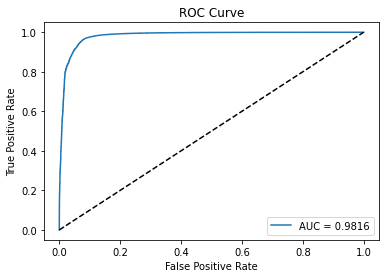

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

##KS

In [72]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [73]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,72174,0,3.415551e-29,1,0,1,0.000011,0.0,0.000096
1,99392,0,7.043722e-29,2,0,2,0.000021,0.0,0.000192
2,379342,0,3.409851e-22,3,0,3,0.000032,0.0,0.000288
3,4717,0,6.645423e-19,4,0,4,0.000043,0.0,0.000384
4,39588,0,1.698954e-18,5,0,5,0.000054,0.0,0.000480


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.8845')

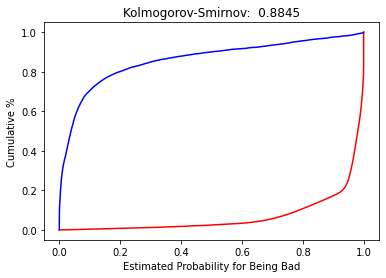

In [74]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

Model yang dibangun menghasilkan performa `AUC = 0.96` dan `KS = 0.88`. Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik.